# 参考Webページ
https://www.takacpu55.xyz/entry/2020/12/31/140303

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML # Jupyter notebook用
# %matplotlib inline # Jupyter notebook用
scaler = MinMaxScaler()

#データ読み込み
df = pd.read_csv("./financial_data/2020_for_cluster.csv", encoding="SHIFT-JIS")
# df_datas = pd.read_csv("./financial_data/for_cluster_analysis.csv", encoding="SHIFT-JIS")
# df_balance = pd.read_csv("./financial_data/for_cluster_analysis.csv", header=1, encoding="SHIFT-JIS")
# df_cf = pd.read_csv("./financial_data/fy-cash-flow-statement.csv", header=1, encoding="SHIFT-JIS")
# df_pl = pd.read_csv('./financial_data/fy-profit-and-loss.csv',header=1, encoding="SHIFT-JIS")
# df_dividend = pd.read_csv('./financial_data/fy-stock-dividend.csv',header=1, encoding="SHIFT-JIS")
# df_code = pd.read_csv('./financial_data/data_j.csv', encoding="SHIFT-JIS")

#企業コードでマージ
# df_datas=pd.merge(df_balance, df_cf, on='コード')
# df_datas=pd.merge(df_datas, df_pl, on='コード')
# df_datas=pd.merge(df_datas, df_dividend, on='コード')
# df_datas=pd.merge(df_datas,df_code,on="コード")

df

,日経会社コード,企業名称,決算期,決算種別,連結基準,<貸借対照表（資産）>資産合計,<損益計算書（期首からの累計期間）>売上高・営業収益［累計］,<基本項目>純資産配当率［累計］,<貸借対照表（負債）>短期借入金・社債合計,<貸借対照表（負債）>長期借入金・社債・転換社債,...,<貸借対照表（純資産）>資本金,<貸借対照表（純資産）>負債・純資産合計／資本及び負債合計,<損益計算書（期首からの累計期間）>税金等調整前当期純利益［累計］,<損益計算書（期首からの累計期間）>当期純利益（連結）［累計］,<【更新中止】連結剰余金計算書>（当期純利益）,<基本項目>期末発行済株式総数,<基本項目>期末発行済株式総数（遡及調整後）,<貸借対照表（純資産）>新株予約権,<貸借対照表（純資産）>純資産合計／資本合計,<貸借対照表（負債）>少数株主持分（米国会計基準）
0,169,オオバ,2020/05,10,0,12586.0,14580.0,NaN,60.0,60.0,...,2131.0,12586.0,1138.0,NaN,NaN,18250000,NaN,230.0,8389.0,NaN
1,740,リソルホールディングス,2020/03,10,0,32157.0,4763.0,NaN,6383.0,10816.0,...,3948.0,32157.0,387.0,NaN,NaN,5564200,NaN,NaN,7540.0,NaN
2,1516,任天堂,2020/03,10,0,1367766.0,1076852.0,NaN,NaN,NaN,...,10065.0,1367766.0,297080.0,NaN,NaN,131669000,NaN,NaN,1051147.0,NaN
3,1636,日本ユニシス,2020/03,10,0,167588.0,178966.0,NaN,5617.0,15717.0,...,5483.0,167588.0,19609.0,NaN,NaN,109663524,NaN,491.0,103745.0,NaN
4,1720,東天紅,2020/02,10,0,12714.0,6777.0,NaN,479.0,579.0,...,2572.0,12714.0,-226.0,NaN,NaN,2572871,NaN,NaN,10008.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,68141,ＣＡＣ Ｈｏｌｄｉｎｇｓ,2020/12,10,0,25224.0,391.0,NaN,NaN,2000.0,...,3702.0,25224.0,-231.0,NaN,NaN,20541400,NaN,NaN,22227.0,NaN
825,91021,ショクブン,2020/03,10,0,4828.0,6644.0,NaN,2895.0,538.0,...,1148.0,4828.0,127.0,NaN,NaN,11856669,NaN,NaN,456.0,NaN
826,91024,アトム,2020/03,10,0,25915.0,45441.0,NaN,1414.0,2559.0,...,4073.0,25915.0,-3977.0,NaN,NaN,184559297,NaN,NaN,12373.0,NaN
827,91061,フォーカスシステムズ,2020/03,10,0,15361.0,22703.0,NaN,1401.0,1551.0,...,2905.0,15361.0,1430.0,NaN,NaN,16292942,NaN,NaN,8885.0,NaN


In [2]:
df.columns.values

array(['日経会社コード', '企業名称', '決算期', '決算種別', '連結基準', '<貸借対照表（資産）>資産合計',
       '<損益計算書（期首からの累計期間）>売上高・営業収益［累計］', '<基本項目>純資産配当率［累計］',
       '<貸借対照表（負債）>短期借入金・社債合計', '<貸借対照表（負債）>長期借入金・社債・転換社債',
       '<貸借対照表（純資産）>自己資本／親会社の所有者に帰属する資本', '<貸借対照表（純資産）>資本金',
       '<貸借対照表（純資産）>負債・純資産合計／資本及び負債合計',
       '<損益計算書（期首からの累計期間）>税金等調整前当期純利益［累計］',
       '<損益計算書（期首からの累計期間）>当期純利益（連結）［累計］', '<【更新中止】連結剰余金計算書>（当期純利益）',
       '<基本項目>期末発行済株式総数', '<基本項目>期末発行済株式総数（遡及調整後）', '<貸借対照表（純資産）>新株予約権',
       '<貸借対照表（純資産）>純資産合計／資本合計', '<貸借対照表（負債）>少数株主持分（米国会計基準）'],
      dtype=object)

In [66]:
df.describe()

,日経会社コード,決算種別,連結基準,<貸借対照表（資産）>資産合計,<損益計算書（期首からの累計期間）>売上高・営業収益［累計］,<基本項目>純資産配当率［累計］,<貸借対照表（負債）>短期借入金・社債合計,<貸借対照表（負債）>長期借入金・社債・転換社債,<貸借対照表（純資産）>自己資本／親会社の所有者に帰属する資本,<貸借対照表（純資産）>資本金,<貸借対照表（純資産）>負債・純資産合計／資本及び負債合計,<損益計算書（期首からの累計期間）>税金等調整前当期純利益［累計］,<損益計算書（期首からの累計期間）>当期純利益（連結）［累計］,<【更新中止】連結剰余金計算書>（当期純利益）,<基本項目>期末発行済株式総数,<基本項目>期末発行済株式総数（遡及調整後）,<貸借対照表（純資産）>新株予約権,<貸借対照表（純資産）>純資産合計／資本合計,<貸借対照表（負債）>少数株主持分（米国会計基準）
count,829.000000,829.0,829.0,8.190000e+02,8.180000e+02,0.0,528.000000,450.000000,8.190000e+02,8.170000e+02,8.190000e+02,818.000000,0.0,0.0,8.290000e+02,0.0,291.000000,8.190000e+02,0.0
mean,29913.441496,10.0,0.0,4.555516e+04,2.196387e+04,NaN,5010.126894,8667.253333,2.967515e+04,7.638141e+03,4.555516e+04,2711.940098,NaN,NaN,4.314974e+07,NaN,214.408935,2.975133e+04,NaN
std,10675.503069,0.0,0.0,3.143302e+05,6.716201e+04,NaN,27487.021286,45177.746611,2.888818e+05,1.229632e+05,3.143302e+05,19965.566523,NaN,NaN,2.467317e+08,NaN,1595.119174,2.889443e+05,NaN
min,169.000000,10.0,0.0,1.370000e+02,3.400000e+01,NaN,3.000000,4.000000,-1.028000e+03,5.000000e+00,1.370000e+02,-225682.000000,NaN,NaN,1.000000e+00,NaN,1.000000,-1.028000e+03,NaN
25%,30376.000000,10.0,0.0,2.899500e+03,1.841250e+03,NaN,160.000000,245.750000,1.506000e+03,3.940000e+02,2.899500e+03,36.250000,NaN,NaN,5.709300e+06,NaN,5.000000,1.512000e+03,NaN
50%,31871.000000,10.0,0.0,7.201000e+03,4.937500e+03,NaN,592.500000,841.500000,4.186000e+03,9.400000e+02,7.201000e+03,418.500000,NaN,NaN,1.293810e+07,NaN,21.000000,4.186000e+03,NaN
75%,32471.000000,10.0,0.0,2.166750e+04,1.514125e+04,NaN,2000.000000,3551.500000,1.272900e+04,2.443000e+03,2.166750e+04,1454.250000,NaN,NaN,2.814880e+07,NaN,84.000000,1.275200e+04,NaN
max,91098.000000,10.0,0.0,8.129402e+06,1.076852e+06,NaN,465470.000000,794689.000000,8.031667e+06,3.500000e+06,8.129402e+06,363246.000000,NaN,NaN,4.822507e+09,NaN,25818.000000,8.031667e+06,NaN


In [3]:
#欠損値を0埋め
df = df.fillna(0)

drop_col = ['日経会社コード'
#             , '企業名称'
            , '決算期'
            , '決算種別'
            , '連結基準'
            ,'<基本項目>純資産配当率［累計］'
            , '<損益計算書（期首からの累計期間）>当期純利益（連結）［累計］'
            , '<【更新中止】連結剰余金計算書>（当期純利益）'
            , '<基本項目>期末発行済株式総数（遡及調整後）'
            , '<貸借対照表（負債）>少数株主持分（米国会計基準）']
df_datas = df.drop(drop_col, axis=1)

In [4]:
df_datas.describe()

,<貸借対照表（資産）>資産合計,<損益計算書（期首からの累計期間）>売上高・営業収益［累計］,<貸借対照表（負債）>短期借入金・社債合計,<貸借対照表（負債）>長期借入金・社債・転換社債,<貸借対照表（純資産）>自己資本／親会社の所有者に帰属する資本,<貸借対照表（純資産）>資本金,<貸借対照表（純資産）>負債・純資産合計／資本及び負債合計,<損益計算書（期首からの累計期間）>税金等調整前当期純利益［累計］,<基本項目>期末発行済株式総数,<貸借対照表（純資産）>新株予約権,<貸借対照表（純資産）>純資産合計／資本合計
count,8.290000e+02,8.290000e+02,829.00000,829.000000,8.290000e+02,8.290000e+02,8.290000e+02,829.000000,8.290000e+02,829.000000,8.290000e+02
mean,4.500564e+04,2.167243e+04,3191.00965,4704.781665,2.931719e+04,7.527577e+03,4.500564e+04,2675.955368,4.314974e+07,75.262967,2.939245e+04
std,3.124660e+05,6.676177e+04,22061.06608,33547.799408,2.871504e+05,1.220724e+05,3.124660e+05,19834.932039,2.467317e+08,949.548098,2.872126e+05
min,0.000000e+00,0.000000e+00,0.00000,0.000000,-1.028000e+03,0.000000e+00,0.000000e+00,-225682.000000,1.000000e+00,0.000000,-1.028000e+03
25%,2.774000e+03,1.746000e+03,0.00000,0.000000,1.444000e+03,3.780000e+02,2.774000e+03,27.000000,5.709300e+06,0.000000,1.446000e+03
50%,6.992000e+03,4.755000e+03,125.00000,50.000000,4.056000e+03,9.010000e+02,6.992000e+03,413.000000,1.293810e+07,0.000000,4.100000e+03
75%,2.160600e+04,1.498900e+04,910.00000,1003.000000,1.244600e+04,2.397000e+03,2.160600e+04,1434.000000,2.814880e+07,7.000000,1.244600e+04
max,8.129402e+06,1.076852e+06,465470.00000,794689.000000,8.031667e+06,3.500000e+06,8.129402e+06,363246.000000,4.822507e+09,25818.000000,8.031667e+06


/Users/hiroki_igeta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/hiroki_igeta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


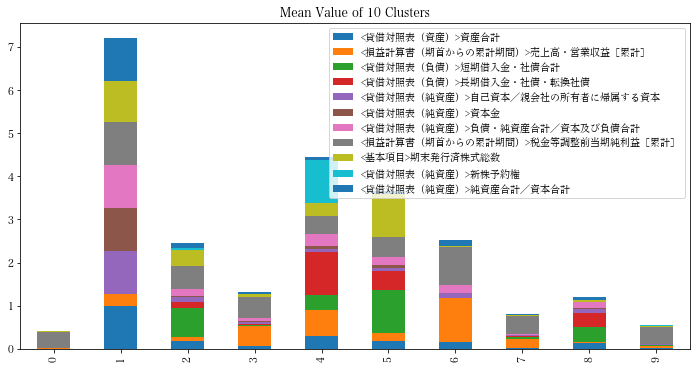

In [5]:
#欠損値を0埋め
# df_datas.replace("-","0",inplace=True)

#必要なデータだけ取ってくる
# params=["総資産","売上高","純資産配当率","短期借入金","長期借入金","自己資本比率","ROE","ROA","EPS"]
params=[
#         '日経会社コード'
#         , '企業名称'
#         , '決算種別'
         '<貸借対照表（資産）>資産合計'
        ,'<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'
        ,'<貸借対照表（負債）>短期借入金・社債合計'
        , '<貸借対照表（負債）>長期借入金・社債・転換社債'
        ,'<貸借対照表（純資産）>自己資本／親会社の所有者に帰属する資本'
        , '<貸借対照表（純資産）>資本金'
        ,'<貸借対照表（純資産）>負債・純資産合計／資本及び負債合計'
        ,'<損益計算書（期首からの累計期間）>税金等調整前当期純利益［累計］'
        ,'<基本項目>期末発行済株式総数'
        , '<貸借対照表（純資産）>新株予約権'
        ,'<貸借対照表（純資産）>純資産合計／資本合計']
df_datastemp=df_datas[params]
df_datastemp.loc[:,:]=scaler.fit_transform(df_datastemp)

temp=[]
for i in range(len(df_datastemp.columns)):
    temp.append(df_datastemp[params[i]])
np_datas=np.array(temp)
np_datas=np_datas.T

#クラスター数を指定する
cluster_num=10

pred=KMeans(n_clusters=cluster_num).fit_predict(np_datas)

#グラフにする
df_datas["cluster_id"]=pred
df_datastemp["cluster_id"]=pred

clusterinfo=pd.DataFrame()
for i in range(cluster_num):
    clusterinfo[str(i)]=df_datastemp[df_datastemp["cluster_id"]==i].mean()
clusterinfo=clusterinfo.drop("cluster_id")

plt.rcParams["font.family"] = 'Hiragino Mincho ProN' # 使用するフォント
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 10 Clusters",figsize=(12, 6))
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=90)

plt.show()
# plt.savefig("bar.jpg")
plt.close('all')

df_datas=df_datas[['cluster_id', '企業名称']]

df_datas.sort_values("cluster_id",inplace=True)
df_datas.to_csv("output_10.csv")

In [70]:
# distortions = []

# for i  in range(2,830):         # 1~10クラスタまで一気に計算
# #     print(i)
#     km = KMeans(n_clusters=i,
#                 init='k-means++',     # k-means++法によりクラスタ中心を選択
#                 n_init=10,
#                 max_iter=300,
#                 random_state=0)
#     km.fit(np_datas)                         # クラスタリングの計算を実行
#     distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

%matplotlib tk
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(range(1,829),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig("elbo")

In [71]:
df_cluster = pd.read_csv("output_10.csv")
df_cluster

,Unnamed: 0,cluster_id,企業名称
0,414,0,ヒューマン・メタボローム・テク
1,421,0,メドピア
2,422,0,レアジョブ
3,668,0,サイバーセキュリティクラウド
4,424,0,中央インターナショナルグループ
...,...,...,...
824,235,19,シミックホールディングス
825,263,19,アウトソーシング
826,171,19,ベネッセホールディングス
827,540,19,ＦＯＯＤ ＆ ＬＩＦＥ ＣＯＭ
